In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

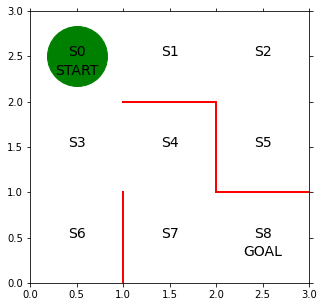

In [2]:
fig = plt.figure(figsize=(5,5))
ax = plt.gca()

plt.plot([1,1], [0,1], color='red', linewidth=2)
plt.plot([1,2], [2,2], color='red', linewidth=2)
plt.plot([2,2], [2,1], color='red', linewidth=2)
plt.plot([2,3], [1,1], color='red', linewidth=2)

plt.text(0.5, 2.5, 'S0', size=14, ha='center')
plt.text(1.5, 2.5, 'S1', size=14, ha='center')
plt.text(2.5, 2.5, 'S2', size=14, ha='center')
plt.text(0.5, 1.5, 'S3', size=14, ha='center')
plt.text(1.5, 1.5, 'S4', size=14, ha='center')
plt.text(2.5, 1.5, 'S5', size=14, ha='center')
plt.text(0.5, 0.5, 'S6', size=14, ha='center')
plt.text(1.5, 0.5, 'S7', size=14, ha='center')
plt.text(2.5, 0.5, 'S8', size=14, ha='center')
plt.text(0.5, 2.3, 'START', size=14, ha='center')
plt.text(2.5, 0.3, 'GOAL', size=14, ha='center')

ax.set_xlim(0,3)
ax.set_ylim(0,3)
plt.tick_params(axis='both', which='both', bottom='off', top='off',
                labelbottom='off', right='off', left='off', labelleft='off')

line, = ax.plot([0.5], [2.5], marker='o', color='g', markersize=60)

In [3]:
theta_0 = np.array([
    [np.nan, 1, 1, np.nan],
    [np.nan, 1, np.nan, 1],
    [np.nan, np.nan, 1, 1],
    [1, 1, 1, np.nan],
    [np.nan, np.nan, 1, 1],
    [1, np.nan, np.nan, np.nan],
    [1, np.nan, np.nan, np.nan],
    [1, 1, np.nan, np.nan]
])

In [4]:
a, b = theta_0.shape
Q = np.random.rand(a,b) * theta_0

In [5]:
def simple_comvert_into_pi_from_theta(theta):
    m, n = theta.shape
    pi = np.zeros((m, n))
    for i in range(m):
        pi[i, :] = theta[i, :] / np.nansum(theta[i, :])
    
    pi = np.nan_to_num(pi)

    return pi

In [6]:
pi_0 = simple_comvert_into_pi_from_theta(theta_0)

In [7]:
pi_0

array([[0.        , 0.5       , 0.5       , 0.        ],
       [0.        , 0.5       , 0.        , 0.5       ],
       [0.        , 0.        , 0.5       , 0.5       ],
       [0.33333333, 0.33333333, 0.33333333, 0.        ],
       [0.        , 0.        , 0.5       , 0.5       ],
       [1.        , 0.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        , 0.        ],
       [0.5       , 0.5       , 0.        , 0.        ]])

In [8]:
def get_action(s, Q, epsilon, pi_0):
    direction = ['up', 'right', 'down', 'left']
    if np.random.rand() < epsilon:
        next_direction = np.random.choice(direction, p=pi_0[s, :])
    else:
        next_direction = direction[np.nanargmax(Q[s, :])]
    
    if next_direction == 'up':
        action = 0
    elif next_direction == 'right':
        action = 1
    elif next_direction == 'down':
        action = 2
    elif next_direction == 'left':
        action = 3
    return action

In [9]:
def get_s_next(s, a, Q, epsilon, pi_0):
    direction = ['up', 'right', 'down', 'left']
    next_direction = direction[a]
    
    if next_direction == 'up':
        s_next = s - 3
    elif next_direction == 'right':
        s_next = s + 1
    elif next_direction == 'down':
        s_next = s + 3
    elif next_direction == 'left':
        s_next = s - 1
    return s_next

In [10]:
def Sarsa(s, a, r, s_next, a_next, Q, eta, gamma):
    if s_next == 8:
        Q[s, a] = Q[s, a] + eta * (r - Q[s, a])
    else:
        Q[s, a] = Q[s, a] + eta * (r + gamma * Q[s_next, a_next] - Q[s, a])
    return Q

In [11]:
def goal_maze_ret_s_a_Q(Q, epsilon, eta, gamma, pi):
    s = 0
    a = a_next = get_action(s, Q, epsilon, pi)
    s_a_history = [[0, np.nan]]

    while True:
        a = a_next
        s_a_history[-1][1] = a
        s_next = get_s_next(s, a, Q, epsilon, pi)

        s_a_history.append([s_next, np.nan])

        if s_next == 8:
            r = 1
            a_next = np.nan
        else:
            r = 0
            a_next = get_action(s_next, Q, epsilon, pi)
        
        Q = Sarsa(s, a, r, s_next, a_next, Q, eta, gamma)

        if s_next == 8:
            break
        else:
            s = s_next
    return s_a_history, Q        

<AxesSubplot:>

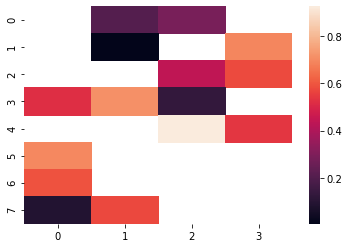

In [12]:
sns.heatmap(Q)

In [14]:
eta = 0.1
gamma = 0.9
epsilon = 0.5
v = np.nanmax(Q, axis=1)
is_continue = True
episode = 1

while is_continue:
    print('episode:', episode)
    epsilon /= 2
    s_a_history, Q = goal_maze_ret_s_a_Q(Q, epsilon, eta, gamma, pi_0)

    new_v = np.nanmax(Q, axis=1)
    print(np.sum(np.abs(new_v - v)))

    print('step:', len(s_a_history)-1)
    v = new_v

    episode += 1
    if episode > 100:
        break

episode: 1
0.1305143363657269
step: 4
episode: 2
0.11104958446110913
step: 4
episode: 3
0.10985263373014714
step: 6
episode: 4
0.07984894716548502
step: 4
episode: 5
0.06750381536386652
step: 4
episode: 6
0.05838728101582785
step: 4
episode: 7
0.051274145029034046
step: 4
episode: 8
0.04470354244193259
step: 4
episode: 9
0.0386859427254313
step: 4
episode: 10
0.03321768937393943
step: 4
episode: 11
0.029376685442698336
step: 4
episode: 12
0.027504450789932244
step: 4
episode: 13
0.025597760224232102
step: 4
episode: 14
0.023704501191152194
step: 4
episode: 15
0.021860024782867526
step: 4
episode: 16
0.020089612079910002
step: 4
episode: 17
0.018586455252938894
step: 4
episode: 18
0.017891419927521857
step: 4
episode: 19
0.017253539486907887
step: 4
episode: 20
0.016663650544076036
step: 4
episode: 21
0.016113747269501655
step: 4
episode: 22
0.015596909055373476
step: 4
episode: 23
0.015107218598730987
step: 4
episode: 24
0.014639674862215846
step: 4
episode: 25
0.014190104336092912
ste